## Customer Segmentation

<P>With RFM analysis we can understand customer purchasing pattern, using which appropriate marketing strategies can be applied to different segments of customers.

In [34]:
#importing the required packages
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

## EDA

In [41]:
data = pd.read_csv('data/Retail_Data_Transactions.csv')
data['trans_date'] = pd.to_datetime(data['trans_date'])
#filtering for one year 
data_1y = data[(data['trans_date'] > '2013-10-31') & (data['trans_date']>'2014-10-31')]

In [42]:
data_1y.columns

Index(['customer_id', 'trans_date', 'tran_amount'], dtype='object')

In [59]:
#Filtering customers who made a purchase in the last 4 months  and made more the 2
# data_1y['month'] = data_1y.apply(lambda x: x['trans_date'].month, axis = 1)
# data_1y['year'] = data_1y.apply(lambda x: x['trans_date'].year, axis = 1)
data_1y['trans_date'].max()
recent_cust = data_1y.groupby('customer_id').agg('max')['trans_date'].reset_index()
recent_cust.columns = ['customer_id', 'recent_date']
cust_1 = recent_cust.drop('recent_date', axis = 1)
cust_visit = data_1y.groupby('customer_id').agg('count')['trans_date'].reset_index()
cust_visit.columns = ['customer_id', 'visit']
cust_2 = cust_visit.drop('visit', axis = 1)
cust_list = cust_1.merge(cust_2, on = 'customer_id', how = 'inner')

In [62]:
len(set(cust_list['customer_id']))

5628

In [64]:
trans = data_1y.groupby(['customer_id']).sum()['tran_amount'].reset_index()
trans = trans.merge(cust_list, on = 'customer_id', how= 'inner')

In [51]:
data_1y['trans_date'][1].month

3

In [133]:
2081634/8123989

0.2562329909604752

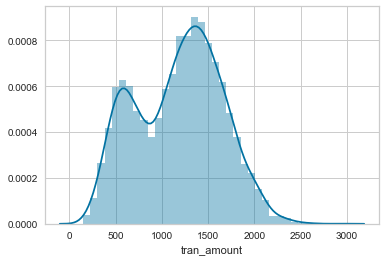

In [134]:
data_1y.head()
sns.distplot(data.groupby('customer_id').agg('sum')['tran_amount'].reset_index().sort_values('tran_amount',ascending=False)['tran_amount'])

In [65]:
# Percentiles based on total amount spend
tot_amt = trans['tran_amount'].sum()
tot_cust = len(set(trans['customer_id']))
trans['perc_range'] = np.where(trans['tran_amount'] < trans['tran_amount'].quantile(.1),'0 to 10',
                                   (np.where((trans['tran_amount']>=trans['tran_amount'].quantile(.1)) 
                                   &(trans['tran_amount']<trans['tran_amount'].quantile(.2)),'10 to 20',
                                             np.where((trans['tran_amount']>=trans['tran_amount'].quantile(.2)) 
                                   &(trans['tran_amount']<trans['tran_amount'].quantile(.3)), '20 to 30', 
                                                     np.where((trans['tran_amount']>=trans['tran_amount'].quantile(.3)) 
                                   &(trans['tran_amount']<trans['tran_amount'].quantile(.4)), '30 to 40', 
                                                             np.where((trans['tran_amount'] >= trans['tran_amount'].quantile(.4))
                                                         & (trans['tran_amount'] < trans['tran_amount'].quantile(.5)),'40 to 50',
                                                    (np.where((trans['tran_amount']>=trans['tran_amount'].quantile(.5)) 
                                   &(trans['tran_amount']<trans['tran_amount'].quantile(.6)),'50 to 60',
                                             np.where((trans['tran_amount']>=trans['tran_amount'].quantile(.6)) 
                                   &(trans['tran_amount']<trans['tran_amount'].quantile(.7)), '60 to 70', 
                                                     np.where((trans['tran_amount']>=trans['tran_amount'].quantile(.7)) 
                                   &(trans['tran_amount']<trans['tran_amount'].quantile(.8)), '70 to 80',
                                                              np.where((trans['tran_amount']>=trans['tran_amount'].quantile(.8)) 
                                   &(trans['tran_amount']<trans['tran_amount'].quantile(.9)), '80 to 90', '90 to 100')))
                                    )))
                                   ))
                                    )))


In [66]:
sales_perc = trans.groupby('perc_range').agg('sum')['tran_amount'].reset_index()
sales_perc.columns = ['perc_range', 'tot_amt']
sales_perc['sales_p'] = sales_perc['tot_amt']/tot_amt

cust_perc = trans.groupby('perc_range').agg('count')['customer_id'].reset_index()
cust_perc.columns = ['perc_range', 'cust_count']
cust_perc['cust_p'] = cust_perc['cust_count']/tot_cust

sales_dist = sales_perc.merge(cust_perc, on = 'perc_range', how = 'inner')

sales_cont = sales_dist[['perc_range', 'sales_p', 'cust_p']]
sales_cont['sales_p'] = sales_cont['sales_p']*100
sales_cont['cust_p'] = sales_cont['cust_p']*100

sales_cont['sales_cum'] = sales_cont['sales_p'].cumsum()
sales_cont['cum_cust'] = sales_cont['cust_p'].cumsum()

C:\Users\hkpat\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\hkpat\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\hkpat\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [67]:
sales_cont

,perc_range,sales_p,cust_p,sales_cum,cum_cust
0,0 to 10,2.215448,9.896944,2.215448,9.896944
1,10 to 20,3.599944,9.612651,5.815392,19.509595
2,20 to 30,4.957655,10.074627,10.773047,29.584222
3,30 to 40,5.960155,9.754797,16.733202,39.339019
4,40 to 50,7.665680,10.447761,24.398883,49.786780
5,50 to 60,9.438294,10.216773,33.837177,60.003554
6,60 to 70,11.089230,9.914712,44.926407,69.918266
7,70 to 80,13.465384,9.968017,58.391791,79.886283
8,80 to 90,17.179098,10.092395,75.570889,89.978678
9,90 to 100,24.429111,10.021322,100.000000,100.000000


Text(0, 0.5, 'Cumilative customer percentage')

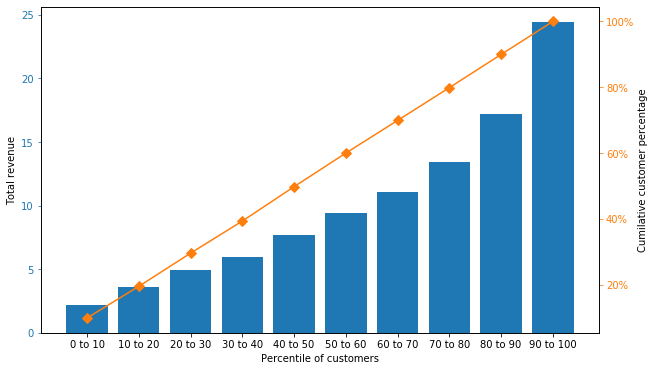

In [68]:
from matplotlib.ticker import PercentFormatter
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(sales_cont.perc_range, sales_cont["sales_p"], color="C0")
ax2 = ax.twinx()
ax2.plot(sales_cont.perc_range, sales_cont["cum_cust"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
ax.set_xlabel('Percentile of customers')
ax.set_ylabel('Total revenue')
ax2.set_ylabel('Cumilative customer percentage')

### Extracting RFM values

In [12]:
#Recency
recency = data_1y.groupby('customer_id').agg('max')['trans_date'].reset_index()
max_date = recency['trans_date'].max()
recency['recency'] = recency.apply(lambda x:(max_date - x['trans_date']).days, axis = 1 )
recency['recency'] = recency['recency']+1

In [13]:
#monetary
total_amt = data_1y.groupby('customer_id').agg('sum')['tran_amount'].reset_index()
total_amt.columns = ['customer_id', 'total_amt']

mean_amt = data_1y.groupby('customer_id').agg('mean')['tran_amount'].reset_index()
mean_amt.columns = ['customer_id', 'mean_amt']

median_amt = data_1y.groupby('customer_id').agg('median')['tran_amount'].reset_index()
median_amt.columns = ['customer_id', 'median_amt']

mode_amt = data_1y.groupby('customer_id').agg(lambda x: x.value_counts().index[0])['tran_amount'].reset_index()
mode_amt.columns = ['customer_id', 'mode_amt']

monetary = mode_amt.merge(median_amt.merge(total_amt.merge(mean_amt, on='customer_id', how = 'inner'), 
                                on='customer_id', how='inner'), on = 'customer_id', how = 'inner')

In [15]:
monetary

,customer_id,mode_amt,median_amt,total_amt,mean_amt
0,CS1112,39,49.0,98,49.000000
1,CS1113,98,78.0,220,73.333333
2,CS1114,79,79.0,211,70.333333
3,CS1115,55,55.0,55,55.000000
4,CS1118,54,57.0,114,57.000000
...,...,...,...,...,...
5623,CS8994,27,27.0,27,27.000000
5624,CS8995,38,38.0,38,38.000000
5625,CS8996,79,68.0,293,58.600000
5626,CS8998,49,49.0,49,49.000000


In [14]:
monetary_final = monetary[['customer_id','total_amt']]

In [16]:
#Frequency
frequency = data_1y.groupby('customer_id').agg('count')['trans_date'].reset_index()
frequency.columns = ['customer_id', 'visits']

In [17]:
#RFM
rfm = monetary_final.merge(frequency.merge(recency, 'inner', 'customer_id'), 'inner', 'customer_id')
rfm.drop('trans_date', axis = 1, inplace = True)
rfm.columns = ['customer_id','monetary', 'frequency', 'recency']
rfm = rfm[['customer_id', 'recency', 'frequency', 'monetary']]

In [30]:
rfm

,customer_id,recency,frequency,monetary
0,CS1112,62,2,98
1,CS1113,36,3,220
2,CS1114,33,3,211
3,CS1115,12,1,55
4,CS1118,3,2,114
...,...,...,...,...
5623,CS8994,90,1,27
5624,CS8995,40,1,38
5625,CS8996,98,5,293
5626,CS8998,85,1,49


In [32]:
rfm.columns

Index(['customer_id', 'recency', 'frequency', 'monetary'], dtype='object')

In [141]:
324755/784040

0.41420718330697415

In [140]:
monetary_final.sort_values('total_amt',ascending=False).head(1125).total_amt.sum()

324755

In [25]:
def check_skew(df_skew, column):
    skew = stats.skew(df_skew[column])
    skewtest = stats.skewtest(df_skew[column])
    plt.title('Distribution of ' + column)
    sns.distplot(df_skew[column])
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return

recency's: Skew: 0.6165736468072155, : SkewtestResult(statistic=17.46399374339154, pvalue=2.6940958115503373e-68)
frequency's: Skew: 1.1706895425505748, : SkewtestResult(statistic=28.999755640789964, pvalue=6.626417215118891e-185)
monetary's: Skew: 1.204881748005976, : SkewtestResult(statistic=29.594578434434215, pvalue=1.7546693617407348e-192)


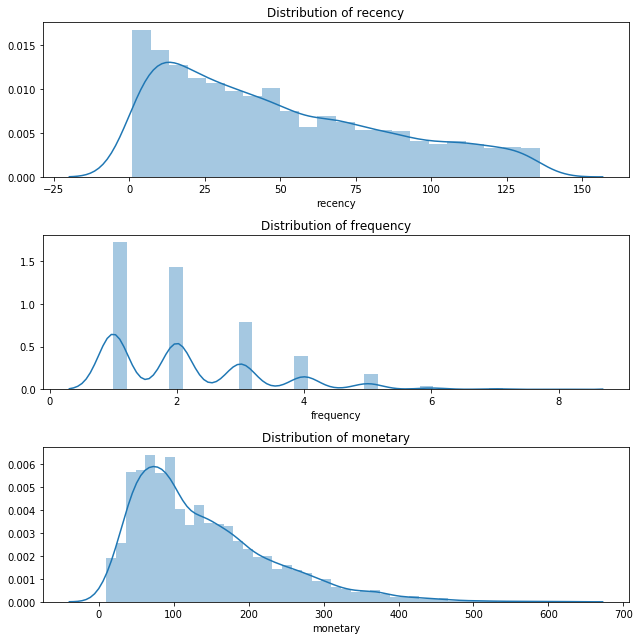

In [33]:
# Plot all 3 graphs together for summary findings
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
check_skew(rfm,'recency')

plt.subplot(3, 1, 2)
check_skew(rfm,'frequency')

plt.subplot(3, 1, 3)
check_skew(rfm,'monetary')

plt.tight_layout()

### Clustering

In [74]:
#Normalizing rfm value
rfm['recency'] = (rfm['recency'] - rfm['recency'].min())/(rfm['recency'].max() - rfm['recency'].min())
rfm['frequency'] = (rfm['frequency'] - rfm['frequency'].min())/(rfm['frequency'].max() - rfm['frequency'].min())
rfm['monetary'] = (rfm['monetary'] - rfm['monetary'].min())/(rfm['monetary'].max() - rfm['monetary'].min())

In [76]:
from scipy.spatial.distance import cdist
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
rfm_values= rfm[['recency', 'frequency', 'monetary']]
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(rfm_values) 
    kmeanModel.fit(rfm_values)     
      
    distortions.append(sum(np.min(cdist(rfm_values, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / rfm_values.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(rfm_values, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / rfm.shape[0] 
    mapping2[k] = kmeanModel.inertia_

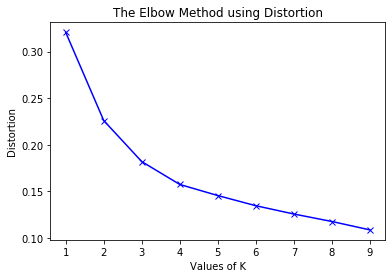

In [77]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

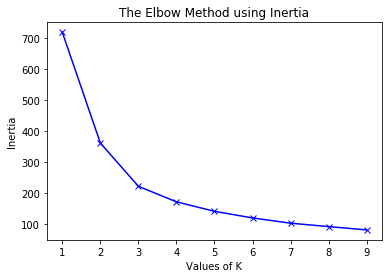

In [78]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()


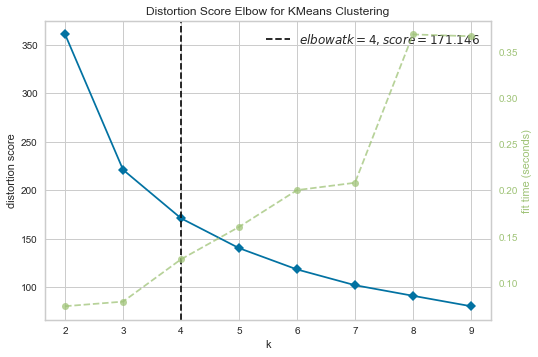

In [83]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(rfm_values) 
visualizer.show()

In [85]:
#KMeans clusters
kmeans = KMeans(n_clusters=5).fit(rfm_values)

In [86]:
kmeans.cluster_centers_

array([[0.19186219, 0.33470456, 0.34184724],
       [0.8089813 , 0.03299916, 0.10809651],
       [0.47492917, 0.09765547, 0.1578502 ],
       [0.13517053, 0.57595175, 0.57422512],
       [0.14350214, 0.08611523, 0.14638596]])

In [89]:
cluster = kmeans.labels_

In [90]:
rfm_final['cluster'] = cluster

In [92]:
rfm_final[rfm_final['cluster'] ==0].drop('cluster', axis = 1).mean()

total_amt    219.726876
visits         3.343805
recency       26.917976
dtype: float64

In [94]:
rfm_final[rfm_final['cluster'] ==1].drop('cluster', axis= 1).mean()

total_amt     76.263158
visits         1.230994
recency      110.212476
dtype: float64

In [95]:
rfm_final[rfm_final['cluster'] ==2].drop('cluster', axis = 1).mean()

total_amt    106.718859
visits         1.683368
recency       65.131524
dtype: float64

In [96]:
rfm_final[rfm_final['cluster'] ==3].drop('cluster', axis = 1).mean()

total_amt    362.124339
visits         5.034392
recency       19.219577
dtype: float64

In [93]:
rfm_final[rfm_final['cluster'] ==4].drop('cluster', axis = 1).mean()

total_amt    99.786106
visits        1.603900
recency      20.380256
dtype: float64

In [121]:
rfm.head()

,customer_id,recency,frequency,monetary
0,CS1112,0.451852,0.142857,0.143556
1,CS1113,0.259259,0.285714,0.342577
2,CS1114,0.237037,0.285714,0.327896
3,CS1115,0.081481,0.000000,0.073409
4,CS1118,0.014815,0.142857,0.169657


In [122]:
norm_rfm = rfm.copy()
norm_rfm['cluster'] = cluster

In [123]:
norm_rfm.head()

,customer_id,recency,frequency,monetary,cluster
0,CS1112,0.451852,0.142857,0.143556,2
1,CS1113,0.259259,0.285714,0.342577,0
2,CS1114,0.237037,0.285714,0.327896,0
3,CS1115,0.081481,0.000000,0.073409,4
4,CS1118,0.014815,0.142857,0.169657,4


In [125]:
melt_rfm = pd.melt(norm_rfm, id_vars = ['customer_id', 'cluster'], 
                   value_vars = ['recency', 'frequency', 'monetary'], 
                   var_name = 'features', value_name='value')
melt_rfm.head()

,customer_id,cluster,features,value
0,CS1112,2,recency,0.451852
1,CS1113,0,recency,0.259259
2,CS1114,0,recency,0.237037
3,CS1115,4,recency,0.081481
4,CS1118,4,recency,0.014815


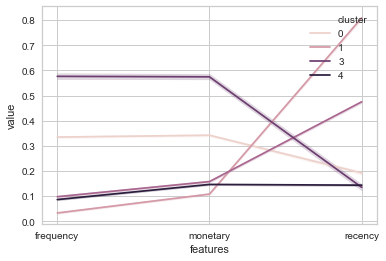

In [126]:
sns.lineplot('features', 'value', hue = 'cluster', data = melt_rfm)